In [37]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/lending-club-loan-data-csv/loan.csv
/kaggle/input/lending-club-loan-data-csv/LCDataDictionary.xlsx


In [38]:
import pandas as pd

# Load all columns as strings to avoid dtype warnings
df = pd.read_csv('/kaggle/input/lending-club-loan-data-csv/loan.csv')

/tmp/ipykernel_37/3337650455.py:4: DtypeWarning: Columns (19,47,55,112,123,124,125,128,129,130,133,139,140,141) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/kaggle/input/lending-club-loan-data-csv/loan.csv')


In [39]:
#reduce the data size to fasten following steps, otherwise the memory will soon run out
df = df.sample(n=100000, random_state=42)

In [40]:
# Check for top 5 rows
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,...,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
1758049,NaN,NaN,35000,35000,35000.0,36 months,12.12,1164.51,B,B3,Legacy Physicians Group,< 1 year,RENT,90000.0,Verified,Jun-2013,Fully Paid,n,NaN,NaN,debt_consolidation,Hospital Debt,775xx,TX,3.51,0.0,Nov-1997,0.0,26.0,NaN,14.0,0.0,1347,8.1,22.0,w,0.00,0.00,36606.090000,36606.09,35000.00,1606.09,0.0,0.0,0.0,Dec-2013,4783.54,NaN,Jan-2014,0.0,...,5.0,7.0,1.0,14.0,0.0,0.0,0.0,1.0,95.0,0.0,0.0,0.0,99068.0,81768.0,13400.0,82368.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
686533,NaN,NaN,30000,30000,30000.0,60 months,10.75,648.54,B,B4,Director of nursing,2 years,RENT,100000.0,Verified,Apr-2016,Current,n,NaN,NaN,credit_card,Credit card refinancing,782xx,TX,22.85,0.0,Jun-2011,2.0,NaN,NaN,17.0,0.0,29780,52.7,25.0,f,14987.66,14987.66,22115.610000,22115.61,15012.34,7103.27,0.0,0.0,0.0,Feb-2019,648.54,Mar-2019,Feb-2019,0.0,...,15.0,18.0,10.0,17.0,0.0,0.0,0.0,0.0,100.0,57.1,0.0,0.0,113051.0,65689.0,30800.0,56551.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
900721,NaN,NaN,15000,15000,15000.0,36 months,7.49,466.53,A,A4,Partner,5 years,OWN,100000.0,Source Verified,Oct-2016,Fully Paid,n,NaN,NaN,small_business,Business,210xx,MD,6.71,0.0,Apr-1996,0.0,NaN,NaN,16.0,0.0,7425,10.3,25.0,w,0.00,0.00,16052.052943,16052.05,15000.00,1052.05,0.0,0.0,0.0,Nov-2017,10466.17,NaN,Dec-2017,0.0,...,13.0,17.0,6.0,16.0,0.0,0.0,0.0,1.0,100.0,0.0,0.0,0.0,226524.0,17874.0,52300.0,15899.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1727912,NaN,NaN,24000,24000,24000.0,60 months,21.15,651.31,E,E2,Einstein Bros. Bagels,5 years,RENT,58000.0,Source Verified,Sep-2013,Fully Paid,n,NaN,NaN,debt_consolidation,Debt Consolidation,282xx,NC,15.50,0.0,Aug-1998,0.0,NaN,NaN,10.0,0.0,24123,72.2,15.0,f,0.00,0.00,39078.323239,39078.32,24000.00,15078.32,0.0,0.0,0.0,Sep-2018,651.03,NaN,Feb-2019,0.0,...,8.0,10.0,7.0,10.0,0.0,0.0,0.0,2.0,100.0,80.0,0.0,0.0,38609.0,27496.0,20600.0,5209.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
539691,NaN,NaN,14400,14400,14400.0,36 months,8.59,455.18,A,A5,Nurse practitioner,3 years,MORTGAGE,90000.0,Not Verified,Aug-2016,C

In [41]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
print("Missing Values:\n", missing_values)

Missing Values:
 id                                            100000
url                                           100000
member_id                                     100000
orig_projected_additional_accrued_interest     99615
hardship_length                                99525
                                               ...  
open_acc                                           2
acc_now_delinq                                     2
pub_rec                                            2
total_acc                                          2
inq_last_6mths                                     2
Length: 111, dtype: int64


In [42]:
# Drop columns with a high percentage of missing values (e.g., >50%)
# Any way these columns are not useful for prediction
df = df.drop(columns=missing_values[missing_values > len(df) * 0.5].index)

In [43]:
import numpy as np
# Impute missing values for numerical columns with the median
numerical_cols = df.select_dtypes(include=[np.number]).columns
df[numerical_cols] = df[numerical_cols].apply(lambda x: x.fillna(x.median()))

In [44]:
# Impute missing values for categorical columns with the mode
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].apply(lambda x: x.fillna(x.mode()[0]))

In [45]:
# Ensure that the 'term' column is a string before using .str methods
df['term'] = df['term'].astype(str)
df['term'] = df['term'].str.extract('(\d+)').astype(int)  # Convert term to integer

# Ensure that the 'int_rate' column is a string before using .str methods
df['int_rate'] = df['int_rate'].astype(str)
df['int_rate'] = df['int_rate'].str.rstrip('%').astype(float) / 100.0  # Convert interest rate to float

# Ensure that the 'revol_util' column is a string before using .str methods
df['revol_util'] = df['revol_util'].astype(str)
df['revol_util'] = df['revol_util'].str.rstrip('%').astype(float) / 100.0  # Convert revolving utilization rate to float


In [46]:
# Remove duplicates
df = df.drop_duplicates()

In [47]:
# Confirm that all missing values are handled
print("Remaining Missing Values:\n", df.isnull().sum().sum())  # Should be 0

Remaining Missing Values:
 0


In [48]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,...,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
1758049,35000,35000,35000.0,36,0.1212,1164.51,B,B3,Legacy Physicians Group,< 1 year,RENT,90000.0,Verified,Jun-2013,Fully Paid,n,debt_consolidation,Hospital Debt,775xx,TX,3.51,0.0,Nov-1997,0.0,14.0,0.0,1347,0.081,22.0,w,0.00,0.00,36606.090000,36606.09,35000.00,1606.09,0.0,0.0,0.0,Dec-2013,4783.54,Jan-2014,0.0,1,Individual,0.0,0.0,81768.0,1.0,2.0,...,1.0,13.0,23129.0,72.0,1.0,2.0,4413.0,58.0,16700.0,1.0,0.0,1.0,1.0,5841.0,12053.0,10.1,0.0,0.0,169.0,190.0,12.0,12.0,1.0,55.0,6.0,1.0,1.0,1.0,2.0,3.0,14.0,5.0,7.0,1.0,14.0,0.0,0.0,0.0,1.0,95.0,0.0,0.0,0.0,99068.0,81768.0,13400.0,82368.0,N,Cash,N
686533,30000,30000,30000.0,60,0.1075,648.54,B,B4,Director of nursing,2 years,RENT,100000.0,Verified,Apr-2016,Current,n,credit_card,Credit card refinancing,782xx,TX,22.85,0.0,Jun-2011,2.0,17.0,0.0,29780,0.527,25.0,f,14987.66,14987.66,22115.610000,22115.61,15012.34,7103.27,0.0,0.0,0.0,Feb-2019,648.54,Feb-2019,0.0,1,Individual,0.0,0.0,65689.0,0.0,2.0,...,1.0,22.0,35909.0,64.0,0.0,3.0,7525.0,58.0,56500.0,4.0,9.0,5.0,4.0,3864.0,12126.0,60.6,0.0,0.0,49.0,57.0,13.0,13.0,0.0,25.0,0.0,0.0,6.0,10.0,7.0,8.0,7.0,15.0,18.0,10.0,17.0,0.0,0.0,0.0,0.0,100.0,57.1,0.0,0.0,113051.0,65689.0,30800.0,56551.0,N,Cash,N
900721,15000,15000,15000.0,36,0.0749,466.53,A,A4,Partner,5 years,OWN,100000.0,Source Verified,Oct-2016,Fully Paid,n,small_business,Business,210xx,MD,6.71,0.0,Apr-1996,0.0,16.0,0.0,7425,0.103,25.0,w,0.00,0.00,16052.052943,16052.05,15000.00,1052.05,0.0,0.0,0.0,Nov-2017,10466.17,Dec-2017,0.0,1,Individual,0.0,0.0,150276.0,0.0,1.0,...,0.0,30.0,9148.0,58.0,1.0,4.0,3673.0,19.0,72300.0,2.0,1.0,1.0,4.0,9392.0,45813.0,12.4,0.0,0.0,96.0,242.0,10.0,10.0,1.0,17.0,10.0,1.0,4.0,6.0,8.0,10.0,4.0,13.0,17.0,6.0,16.0,0.0,0.0,0.0,1.0,100.0,0.0,0.0,0.0,226524.0,17874.0,52300.0,15899.0,N,Cash,N
1727912,24000,24000,24000.0,60,0.2115,651.31,E,E2,Einstein Bros. Bagels,5 years,RENT,58000.0,Source Verified,Sep-2013,Fully Paid,n,debt_consolidation,Debt Consolidation,282xx,NC,15.50,0.0,Aug-1998,0.0,10.0,0.0,24123,0.722,15.0,f,0.00,0.00,39078.323239,39078.32,24000.00,15078.32,0.0,0.0,0.0,Sep-2018,651.03,Feb-2019,0.0,1,Individual,0.0,0.0,27496.0,1.0,2.0,...,1.0,13.0,23129.0,72.0,1.0,2.0,4413.0,58.0,33400.0,1.0,0.0,1.0,2.0,2750.0,1447.0,93.0,0.0,0.0,90.0,183.0,10.0,10.0,0.0,10.0,10.0,0.0,4.0,7.0,5.0,7.0,5.0,8.0,10.0,7.0,10.0,0.0,0.0,0.0,2.0,100.0,80.0,0.0,0.0,38609.0,27496.0,20600.0,5209.0,N,Cash,N
539691,14400,14400,14400.0,36,0.0859,455.18,A,A5,Nurse practitioner,3 years,MORTGAGE,90000.0,Not Verified,Aug-2016,Current,n,debt_consolidation,Debt consolidation,658xx,MO,19.88,0.0,Dec-2003,0.0,19.0,0.0,166

In [49]:
# Determining the loans that are bad from loan_status column -- dependent variable (y)
bad_loan = ["Charged Off", "Default", "Does not meet the credit policy. Status:Charged Off", "In Grace Period",
            "Late (16-30 days)", "Late (31-120 days)"]
df['loan_condition_int'] = df['loan_status'].apply(lambda status: 1 if status in bad_loan else 0).astype(int)
df['loan_condition'] = np.where(df['loan_condition_int'] == 0, 'Good Loan', 'Bad Loan')

In [50]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag,loan_condition_int,loan_condition
1758049,35000,35000,35000.0,36,0.1212,1164.51,B,B3,Legacy Physicians Group,< 1 year,RENT,90000.0,Verified,Jun-2013,Fully Paid,n,debt_consolidation,Hospital Debt,775xx,TX,3.51,0.0,Nov-1997,0.0,14.0,0.0,1347,0.081,22.0,w,0.00,0.00,36606.090000,36606.09,35000.00,1606.09,0.0,0.0,0.0,Dec-2013,4783.54,Jan-2014,0.0,1,Individual,0.0,0.0,81768.0,1.0,2.0,...,23129.0,72.0,1.0,2.0,4413.0,58.0,16700.0,1.0,0.0,1.0,1.0,5841.0,12053.0,10.1,0.0,0.0,169.0,190.0,12.0,12.0,1.0,55.0,6.0,1.0,1.0,1.0,2.0,3.0,14.0,5.0,7.0,1.0,14.0,0.0,0.0,0.0,1.0,95.0,0.0,0.0,0.0,99068.0,81768.0,13400.0,82368.0,N,Cash,N,0,Good Loan
686533,30000,30000,30000.0,60,0.1075,648.54,B,B4,Director of nursing,2 years,RENT,100000.0,Verified,Apr-2016,Current,n,credit_card,Credit card refinancing,782xx,TX,22.85,0.0,Jun-2011,2.0,17.0,0.0,29780,0.527,25.0,f,14987.66,14987.66,22115.610000,22115.61,15012.34,7103.27,0.0,0.0,0.0,Feb-2019,648.54,Feb-2019,0.0,1,Individual,0.0,0.0,65689.0,0.0,2.0,...,35909.0,64.0,0.0,3.0,7525.0,58.0,56500.0,4.0,9.0,5.0,4.0,3864.0,12126.0,60.6,0.0,0.0,49.0,57.0,13.0,13.0,0.0,25.0,0.0,0.0,6.0,10.0,7.0,8.0,7.0,15.0,18.0,10.0,17.0,0.0,0.0,0.0,0.0,100.0,57.1,0.0,0.0,113051.0,65689.0,30800.0,56551.0,N,Cash,N,0,Good Loan
900721,15000,15000,15000.0,36,0.0749,466.53,A,A4,Partner,5 years,OWN,100000.0,Source Verified,Oct-2016,Fully Paid,n,small_business,Business,210xx,MD,6.71,0.0,Apr-1996,0.0,16.0,0.0,7425,0.103,25.0,w,0.00,0.00,16052.052943,16052.05,15000.00,1052.05,0.0,0.0,0.0,Nov-2017,10466.17,Dec-2017,0.0,1,Individual,0.0,0.0,150276.0,0.0,1.0,...,9148.0,58.0,1.0,4.0,3673.0,19.0,72300.0,2.0,1.0,1.0,4.0,9392.0,45813.0,12.4,0.0,0.0,96.0,242.0,10.0,10.0,1.0,17.0,10.0,1.0,4.0,6.0,8.0,10.0,4.0,13.0,17.0,6.0,16.0,0.0,0.0,0.0,1.0,100.0,0.0,0.0,0.0,226524.0,17874.0,52300.0,15899.0,N,Cash,N,0,Good Loan
1727912,24000,24000,24000.0,60,0.2115,651.31,E,E2,Einstein Bros. Bagels,5 years,RENT,58000.0,Source Verified,Sep-2013,Fully Paid,n,debt_consolidation,Debt Consolidation,282xx,NC,15.50,0.0,Aug-1998,0.0,10.0,0.0,24123,0.722,15.0,f,0.00,0.00,39078.323239,39078.32,24000.00,15078.32,0.0,0.0,0.0,Sep-2018,651.03,Feb-2019,0.0,1,Individual,0.0,0.0,27496.0,1.0,2.0,...,23129.0,72.0,1.0,2.0,4413.0,58.0,33400.0,1.0,0.0,1.0,2.0,2750.0,1447.0,93.0,0.0,0.0,90.0,183.0,10.0,10.0,0.0,10.0,10.0,0.0,4.0,7.0,5.0,7.0,5.0,8.0,10.0,7.0,10.0,0.0,0.0,0.0,2.0,100.0,80.0,0.0,0.0,38609.0,27496.0,20600.0,5209.0,N,Cash,N,0,Good Loan
539691,14400,14400,14400.0,36,0.0859,455.18,A,A5,Nurse practitioner,3 years,MORTGAGE,90000.0,Not Verified,Aug-2016,Current,n,debt_consolidation,Debt consolidation,658xx,MO,19.88,0.0,Dec-2003,0

In [51]:

# Mapping emp_length to numerical values
emp_length_mapping = {
    '10+ years': 10,
    '9 years': 9,
    '8 years': 8,
    '7 years': 7, 
    '6 years': 6,
    '5 years': 5,
    '4 years': 4,
    '3 years': 3,
    '2 years': 2,
    '1 year': 1,
    '< 1 year': 0.5,
    'n/a': 0
}
df['emp_length_int'] = df['emp_length'].map(emp_length_mapping)


In [52]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag,loan_condition_int,loan_condition,emp_length_int
1758049,35000,35000,35000.0,36,0.1212,1164.51,B,B3,Legacy Physicians Group,< 1 year,RENT,90000.0,Verified,Jun-2013,Fully Paid,n,debt_consolidation,Hospital Debt,775xx,TX,3.51,0.0,Nov-1997,0.0,14.0,0.0,1347,0.081,22.0,w,0.00,0.00,36606.090000,36606.09,35000.00,1606.09,0.0,0.0,0.0,Dec-2013,4783.54,Jan-2014,0.0,1,Individual,0.0,0.0,81768.0,1.0,2.0,...,72.0,1.0,2.0,4413.0,58.0,16700.0,1.0,0.0,1.0,1.0,5841.0,12053.0,10.1,0.0,0.0,169.0,190.0,12.0,12.0,1.0,55.0,6.0,1.0,1.0,1.0,2.0,3.0,14.0,5.0,7.0,1.0,14.0,0.0,0.0,0.0,1.0,95.0,0.0,0.0,0.0,99068.0,81768.0,13400.0,82368.0,N,Cash,N,0,Good Loan,0.5
686533,30000,30000,30000.0,60,0.1075,648.54,B,B4,Director of nursing,2 years,RENT,100000.0,Verified,Apr-2016,Current,n,credit_card,Credit card refinancing,782xx,TX,22.85,0.0,Jun-2011,2.0,17.0,0.0,29780,0.527,25.0,f,14987.66,14987.66,22115.610000,22115.61,15012.34,7103.27,0.0,0.0,0.0,Feb-2019,648.54,Feb-2019,0.0,1,Individual,0.0,0.0,65689.0,0.0,2.0,...,64.0,0.0,3.0,7525.0,58.0,56500.0,4.0,9.0,5.0,4.0,3864.0,12126.0,60.6,0.0,0.0,49.0,57.0,13.0,13.0,0.0,25.0,0.0,0.0,6.0,10.0,7.0,8.0,7.0,15.0,18.0,10.0,17.0,0.0,0.0,0.0,0.0,100.0,57.1,0.0,0.0,113051.0,65689.0,30800.0,56551.0,N,Cash,N,0,Good Loan,2.0
900721,15000,15000,15000.0,36,0.0749,466.53,A,A4,Partner,5 years,OWN,100000.0,Source Verified,Oct-2016,Fully Paid,n,small_business,Business,210xx,MD,6.71,0.0,Apr-1996,0.0,16.0,0.0,7425,0.103,25.0,w,0.00,0.00,16052.052943,16052.05,15000.00,1052.05,0.0,0.0,0.0,Nov-2017,10466.17,Dec-2017,0.0,1,Individual,0.0,0.0,150276.0,0.0,1.0,...,58.0,1.0,4.0,3673.0,19.0,72300.0,2.0,1.0,1.0,4.0,9392.0,45813.0,12.4,0.0,0.0,96.0,242.0,10.0,10.0,1.0,17.0,10.0,1.0,4.0,6.0,8.0,10.0,4.0,13.0,17.0,6.0,16.0,0.0,0.0,0.0,1.0,100.0,0.0,0.0,0.0,226524.0,17874.0,52300.0,15899.0,N,Cash,N,0,Good Loan,5.0
1727912,24000,24000,24000.0,60,0.2115,651.31,E,E2,Einstein Bros. Bagels,5 years,RENT,58000.0,Source Verified,Sep-2013,Fully Paid,n,debt_consolidation,Debt Consolidation,282xx,NC,15.50,0.0,Aug-1998,0.0,10.0,0.0,24123,0.722,15.0,f,0.00,0.00,39078.323239,39078.32,24000.00,15078.32,0.0,0.0,0.0,Sep-2018,651.03,Feb-2019,0.0,1,Individual,0.0,0.0,27496.0,1.0,2.0,...,72.0,1.0,2.0,4413.0,58.0,33400.0,1.0,0.0,1.0,2.0,2750.0,1447.0,93.0,0.0,0.0,90.0,183.0,10.0,10.0,0.0,10.0,10.0,0.0,4.0,7.0,5.0,7.0,5.0,8.0,10.0,7.0,10.0,0.0,0.0,0.0,2.0,100.0,80.0,0.0,0.0,38609.0,27496.0,20600.0,5209.0,N,Cash,N,0,Good Loan,5.0
539691,14400,14400,14400.0,36,0.0859,455.18,A,A5,Nurse practitioner,3 years,MORTGAGE,90000.0,Not Verified,Aug-2016,Current,n,debt_consolidation,Debt consolidation,658xx,MO,19.88,0.0,Dec-2003,0.0,19.0,0.0,1

In [53]:
# Mapping addr_state to region
state_to_region = {
    'CA': 'West', 'OR': 'West', 'UT': 'West', 'WA': 'West', 'CO': 'West',
    'NV': 'West', 'AK': 'West', 'MT': 'West', 'HI': 'West', 'WY': 'West', 'ID': 'West',
    'AZ': 'SouthWest', 'TX': 'SouthWest', 'NM': 'SouthWest', 'OK': 'SouthWest',
    'GA': 'SouthEast', 'NC': 'SouthEast', 'VA': 'SouthEast', 'FL': 'SouthEast', 'KY': 'SouthEast',
    'SC': 'SouthEast', 'LA': 'SouthEast', 'AL': 'SouthEast', 'WV': 'SouthEast', 'DC': 'SouthEast',
    'AR': 'SouthEast', 'DE': 'SouthEast', 'MS': 'SouthEast', 'TN': 'SouthEast',
    'IL': 'MidWest', 'MO': 'MidWest', 'MN': 'MidWest', 'OH': 'MidWest', 'WI': 'MidWest',
    'KS': 'MidWest', 'MI': 'MidWest', 'SD': 'MidWest', 'IA': 'MidWest', 'NE': 'MidWest',
    'IN': 'MidWest', 'ND': 'MidWest',
    'CT': 'NorthEast', 'NY': 'NorthEast', 'PA': 'NorthEast', 'NJ': 'NorthEast', 'RI': 'NorthEast',
    'MA': 'NorthEast', 'MD': 'NorthEast', 'VT': 'NorthEast', 'NH': 'NorthEast', 'ME': 'NorthEast'
}
df['region'] = df['addr_state'].map(state_to_region)

In [54]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,...,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag,loan_condition_int,loan_condition,emp_length_int,region
1758049,35000,35000,35000.0,36,0.1212,1164.51,B,B3,Legacy Physicians Group,< 1 year,RENT,90000.0,Verified,Jun-2013,Fully Paid,n,debt_consolidation,Hospital Debt,775xx,TX,3.51,0.0,Nov-1997,0.0,14.0,0.0,1347,0.081,22.0,w,0.00,0.00,36606.090000,36606.09,35000.00,1606.09,0.0,0.0,0.0,Dec-2013,4783.54,Jan-2014,0.0,1,Individual,0.0,0.0,81768.0,1.0,2.0,...,1.0,2.0,4413.0,58.0,16700.0,1.0,0.0,1.0,1.0,5841.0,12053.0,10.1,0.0,0.0,169.0,190.0,12.0,12.0,1.0,55.0,6.0,1.0,1.0,1.0,2.0,3.0,14.0,5.0,7.0,1.0,14.0,0.0,0.0,0.0,1.0,95.0,0.0,0.0,0.0,99068.0,81768.0,13400.0,82368.0,N,Cash,N,0,Good Loan,0.5,SouthWest
686533,30000,30000,30000.0,60,0.1075,648.54,B,B4,Director of nursing,2 years,RENT,100000.0,Verified,Apr-2016,Current,n,credit_card,Credit card refinancing,782xx,TX,22.85,0.0,Jun-2011,2.0,17.0,0.0,29780,0.527,25.0,f,14987.66,14987.66,22115.610000,22115.61,15012.34,7103.27,0.0,0.0,0.0,Feb-2019,648.54,Feb-2019,0.0,1,Individual,0.0,0.0,65689.0,0.0,2.0,...,0.0,3.0,7525.0,58.0,56500.0,4.0,9.0,5.0,4.0,3864.0,12126.0,60.6,0.0,0.0,49.0,57.0,13.0,13.0,0.0,25.0,0.0,0.0,6.0,10.0,7.0,8.0,7.0,15.0,18.0,10.0,17.0,0.0,0.0,0.0,0.0,100.0,57.1,0.0,0.0,113051.0,65689.0,30800.0,56551.0,N,Cash,N,0,Good Loan,2.0,SouthWest
900721,15000,15000,15000.0,36,0.0749,466.53,A,A4,Partner,5 years,OWN,100000.0,Source Verified,Oct-2016,Fully Paid,n,small_business,Business,210xx,MD,6.71,0.0,Apr-1996,0.0,16.0,0.0,7425,0.103,25.0,w,0.00,0.00,16052.052943,16052.05,15000.00,1052.05,0.0,0.0,0.0,Nov-2017,10466.17,Dec-2017,0.0,1,Individual,0.0,0.0,150276.0,0.0,1.0,...,1.0,4.0,3673.0,19.0,72300.0,2.0,1.0,1.0,4.0,9392.0,45813.0,12.4,0.0,0.0,96.0,242.0,10.0,10.0,1.0,17.0,10.0,1.0,4.0,6.0,8.0,10.0,4.0,13.0,17.0,6.0,16.0,0.0,0.0,0.0,1.0,100.0,0.0,0.0,0.0,226524.0,17874.0,52300.0,15899.0,N,Cash,N,0,Good Loan,5.0,NorthEast
1727912,24000,24000,24000.0,60,0.2115,651.31,E,E2,Einstein Bros. Bagels,5 years,RENT,58000.0,Source Verified,Sep-2013,Fully Paid,n,debt_consolidation,Debt Consolidation,282xx,NC,15.50,0.0,Aug-1998,0.0,10.0,0.0,24123,0.722,15.0,f,0.00,0.00,39078.323239,39078.32,24000.00,15078.32,0.0,0.0,0.0,Sep-2018,651.03,Feb-2019,0.0,1,Individual,0.0,0.0,27496.0,1.0,2.0,...,1.0,2.0,4413.0,58.0,33400.0,1.0,0.0,1.0,2.0,2750.0,1447.0,93.0,0.0,0.0,90.0,183.0,10.0,10.0,0.0,10.0,10.0,0.0,4.0,7.0,5.0,7.0,5.0,8.0,10.0,7.0,10.0,0.0,0.0,0.0,2.0,100.0,80.0,0.0,0.0,38609.0,27496.0,20600.0,5209.0,N,Cash,N,0,Good Loan,5.0,SouthEast
539691,14400,14400,14400.0,36,0.0859,455.18,A,A5,Nurse practitioner,3 years,MORTGAGE,90000.0,Not Verified,Aug-2016,Current,n,debt_consolidation,Debt consolidation,658xx,MO,19.88,0.0,Dec-

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# Descriptive statistics for numerical variables
print("Descriptive Statistics:\n", df.describe())

Descriptive Statistics:
            loan_amnt    funded_amnt  funded_amnt_inv           term  \
count  100000.000000  100000.000000    100000.000000  100000.000000   
mean    15031.287250   15027.200250     15009.932143      42.853680   
std      9215.551155    9213.591039      9217.677890      10.840506   
min       800.000000     800.000000         0.000000      36.000000   
25%      8000.000000    8000.000000      8000.000000      36.000000   
50%     12800.000000   12800.000000     12750.000000      36.000000   
75%     20000.000000   20000.000000     20000.000000      60.000000   
max     40000.000000   40000.000000     40000.000000      60.000000   

            int_rate    installment    annual_inc            dti  \
count  100000.000000  100000.000000  1.000000e+05  100000.000000   
mean        0.131104     445.918598  7.765991e+04      18.824685   
std         0.048466     268.321165  7.156694e+04      13.372932   
min         0.053100      21.250000  0.000000e+00      -1.00000

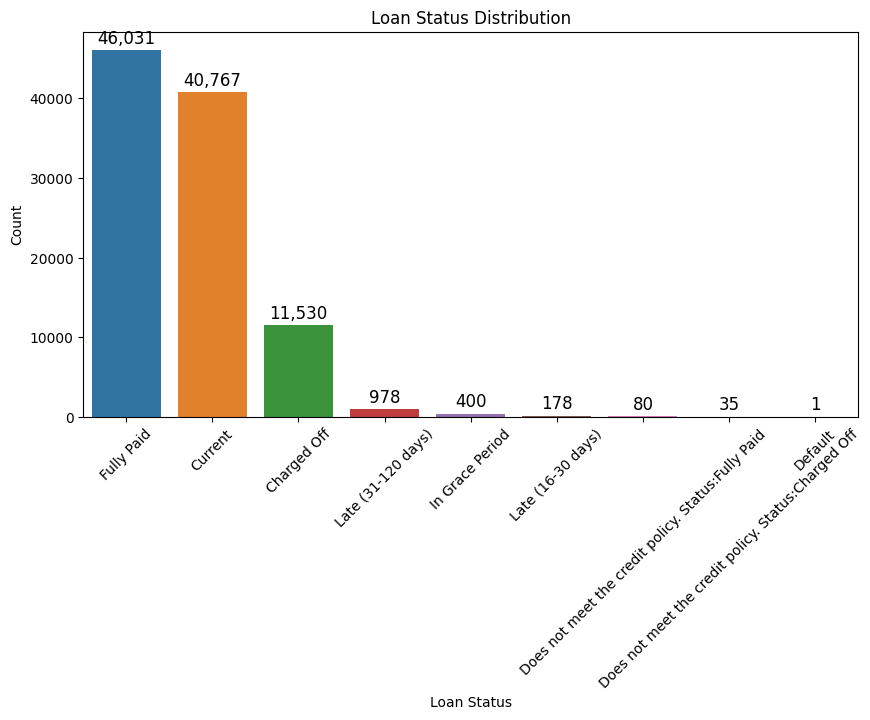

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# Univariate analysis for a categorical variable (loan_status)
plt.figure(figsize=(10, 5))

# Create the countplot
ax = sns.countplot(data=df, x='loan_status', order=df['loan_status'].value_counts().index)

# Annotate each bar with the count value
for p in ax.patches:
    ax.annotate(f'{int(p.get_height()):,}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

# Disable scientific notation on the y-axis
ax.yaxis.get_major_formatter().set_scientific(False)

# Set the title and labels
plt.title('Loan Status Distribution')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

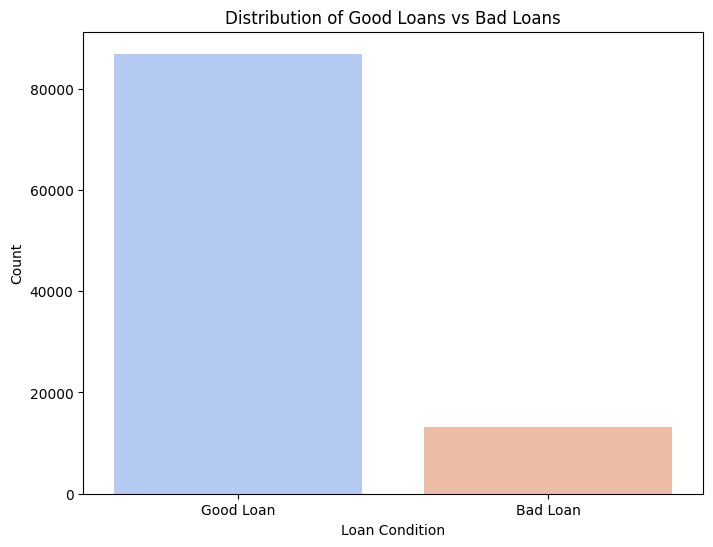

In [57]:
# Plotting the distribution of Good Loan vs. Bad Loan
def plot_good_bad_loan_distribution(dataframe):
    plt.figure(figsize=(8, 6))
    sns.countplot(x='loan_condition', data=dataframe, palette='coolwarm')
    plt.title('Distribution of Good Loans vs Bad Loans')
    plt.xlabel('Loan Condition')
    plt.ylabel('Count')
    plt.show()

# Call the function to plot
plot_good_bad_loan_distribution(df)


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


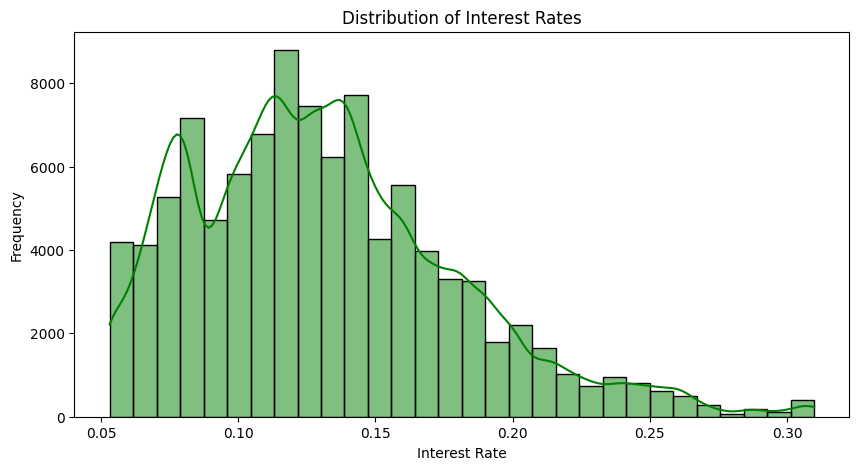

In [58]:
# Univariate analysis for interest rate
plt.figure(figsize=(10, 5))
sns.histplot(df['int_rate'], bins=30, kde=True, color='green')
plt.title('Distribution of Interest Rates')
plt.xlabel('Interest Rate')
plt.ylabel('Frequency')
plt.show()

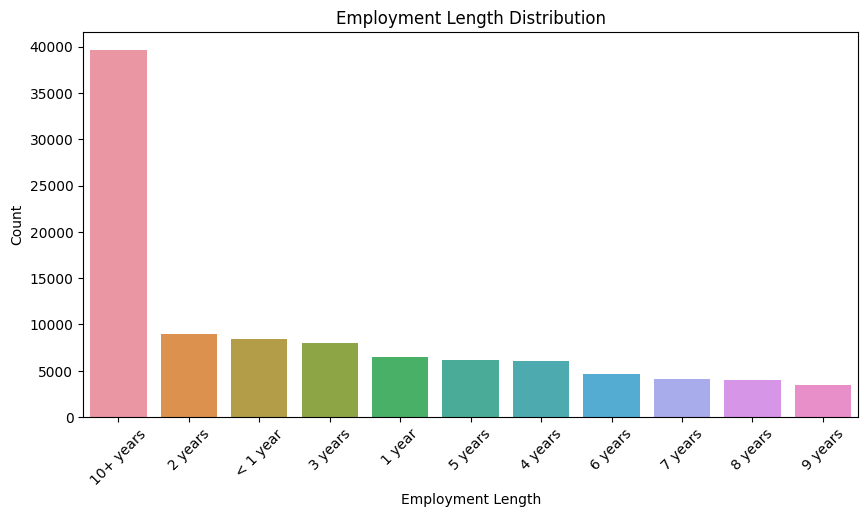

In [59]:
# Univariate analysis for employment length
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='emp_length', order=df['emp_length'].value_counts().index)
plt.title('Employment Length Distribution')
plt.xlabel('Employment Length')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

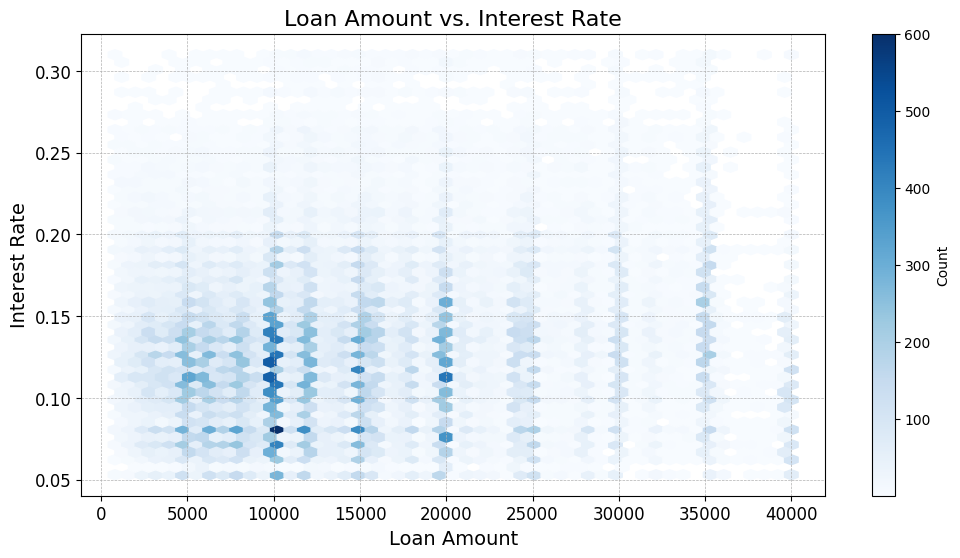

In [60]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.hexbin(df['loan_amnt'], df['int_rate'], gridsize=50, cmap='Blues', mincnt=1)
plt.colorbar(label='Count')
plt.title('Loan Amount vs. Interest Rate', fontsize=16)
plt.xlabel('Loan Amount', fontsize=14)
plt.ylabel('Interest Rate', fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

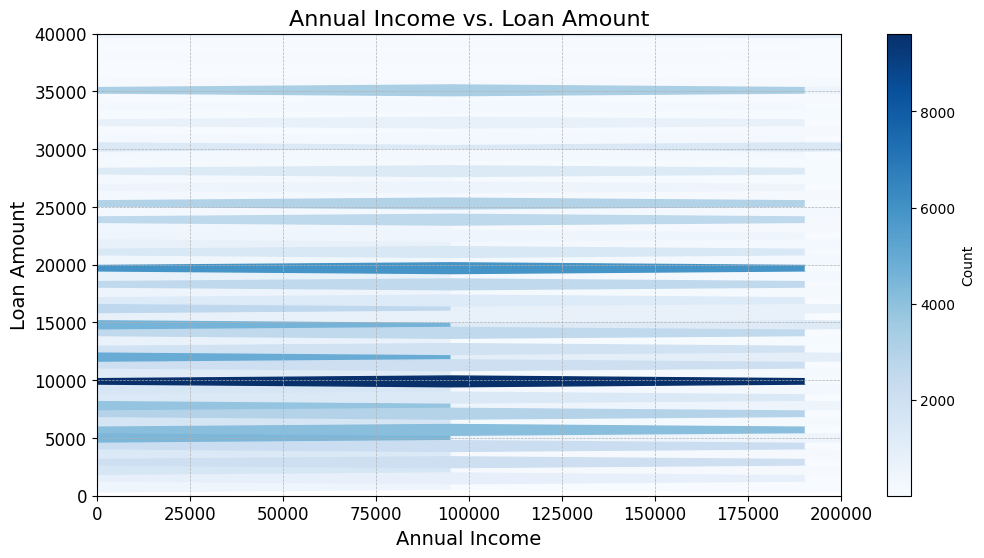

In [61]:
import matplotlib.pyplot as plt

# Bivariate analysis between annual income and loan amount using hexbin plot
plt.figure(figsize=(12, 6))
plt.hexbin(df['annual_inc'], df['loan_amnt'], gridsize=50, cmap='Blues', mincnt=1)
plt.colorbar(label='Count')
plt.title('Annual Income vs. Loan Amount', fontsize=16)
plt.xlabel('Annual Income', fontsize=14)
plt.ylabel('Loan Amount', fontsize=14)
plt.xlim(0, 200000)  # Limit for visualization purposes
plt.ylim(0, df['loan_amnt'].max())
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

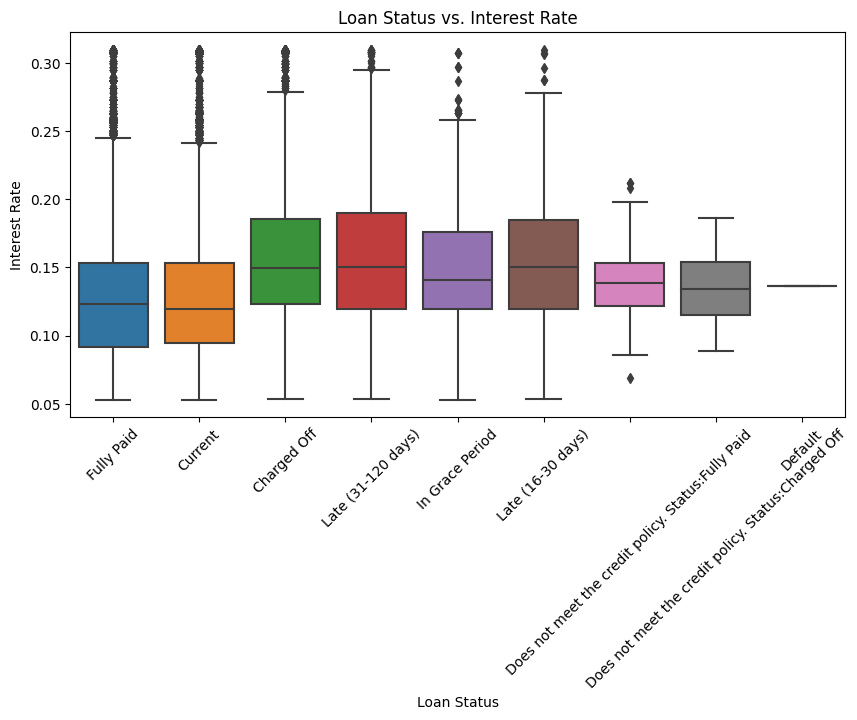

In [62]:
# Bivariate analysis between loan status and interest rate
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='loan_status', y='int_rate', order=df['loan_status'].value_counts().index)
plt.title('Loan Status vs. Interest Rate')
plt.xlabel('Loan Status')
plt.ylabel('Interest Rate')
plt.xticks(rotation=45)
plt.show()

In [63]:
import pandas as pd

# Set to display 100 rows and columns
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

# Ensure the settings are applied to the notebook
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100


In [64]:
df.dtypes

loan_amnt                 int64
funded_amnt               int64
funded_amnt_inv         float64
term                      int64
int_rate                float64
                         ...   
debt_settlement_flag     object
loan_condition_int        int64
loan_condition           object
emp_length_int          float64
region                   object
Length: 105, dtype: object

In [65]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,...,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag,loan_condition_int,loan_condition,emp_length_int,region
1758049,35000,35000,35000.0,36,0.1212,1164.51,B,B3,Legacy Physicians Group,< 1 year,RENT,90000.0,Verified,Jun-2013,Fully Paid,n,debt_consolidation,Hospital Debt,775xx,TX,3.51,0.0,Nov-1997,0.0,14.0,0.0,1347,0.081,22.0,w,0.00,0.00,36606.090000,36606.09,35000.00,1606.09,0.0,0.0,0.0,Dec-2013,4783.54,Jan-2014,0.0,1,Individual,0.0,0.0,81768.0,1.0,2.0,...,1.0,2.0,4413.0,58.0,16700.0,1.0,0.0,1.0,1.0,5841.0,12053.0,10.1,0.0,0.0,169.0,190.0,12.0,12.0,1.0,55.0,6.0,1.0,1.0,1.0,2.0,3.0,14.0,5.0,7.0,1.0,14.0,0.0,0.0,0.0,1.0,95.0,0.0,0.0,0.0,99068.0,81768.0,13400.0,82368.0,N,Cash,N,0,Good Loan,0.5,SouthWest
686533,30000,30000,30000.0,60,0.1075,648.54,B,B4,Director of nursing,2 years,RENT,100000.0,Verified,Apr-2016,Current,n,credit_card,Credit card refinancing,782xx,TX,22.85,0.0,Jun-2011,2.0,17.0,0.0,29780,0.527,25.0,f,14987.66,14987.66,22115.610000,22115.61,15012.34,7103.27,0.0,0.0,0.0,Feb-2019,648.54,Feb-2019,0.0,1,Individual,0.0,0.0,65689.0,0.0,2.0,...,0.0,3.0,7525.0,58.0,56500.0,4.0,9.0,5.0,4.0,3864.0,12126.0,60.6,0.0,0.0,49.0,57.0,13.0,13.0,0.0,25.0,0.0,0.0,6.0,10.0,7.0,8.0,7.0,15.0,18.0,10.0,17.0,0.0,0.0,0.0,0.0,100.0,57.1,0.0,0.0,113051.0,65689.0,30800.0,56551.0,N,Cash,N,0,Good Loan,2.0,SouthWest
900721,15000,15000,15000.0,36,0.0749,466.53,A,A4,Partner,5 years,OWN,100000.0,Source Verified,Oct-2016,Fully Paid,n,small_business,Business,210xx,MD,6.71,0.0,Apr-1996,0.0,16.0,0.0,7425,0.103,25.0,w,0.00,0.00,16052.052943,16052.05,15000.00,1052.05,0.0,0.0,0.0,Nov-2017,10466.17,Dec-2017,0.0,1,Individual,0.0,0.0,150276.0,0.0,1.0,...,1.0,4.0,3673.0,19.0,72300.0,2.0,1.0,1.0,4.0,9392.0,45813.0,12.4,0.0,0.0,96.0,242.0,10.0,10.0,1.0,17.0,10.0,1.0,4.0,6.0,8.0,10.0,4.0,13.0,17.0,6.0,16.0,0.0,0.0,0.0,1.0,100.0,0.0,0.0,0.0,226524.0,17874.0,52300.0,15899.0,N,Cash,N,0,Good Loan,5.0,NorthEast
1727912,24000,24000,24000.0,60,0.2115,651.31,E,E2,Einstein Bros. Bagels,5 years,RENT,58000.0,Source Verified,Sep-2013,Fully Paid,n,debt_consolidation,Debt Consolidation,282xx,NC,15.50,0.0,Aug-1998,0.0,10.0,0.0,24123,0.722,15.0,f,0.00,0.00,39078.323239,39078.32,24000.00,15078.32,0.0,0.0,0.0,Sep-2018,651.03,Feb-2019,0.0,1,Individual,0.0,0.0,27496.0,1.0,2.0,...,1.0,2.0,4413.0,58.0,33400.0,1.0,0.0,1.0,2.0,2750.0,1447.0,93.0,0.0,0.0,90.0,183.0,10.0,10.0,0.0,10.0,10.0,0.0,4.0,7.0,5.0,7.0,5.0,8.0,10.0,7.0,10.0,0.0,0.0,0.0,2.0,100.0,80.0,0.0,0.0,38609.0,27496.0,20600.0,5209.0,N,Cash,N,0,Good Loan,5.0,SouthEast
539691,14400,14400,14400.0,36,0.0859,455.18,A,A5,Nurse practitioner,3 years,MORTGAGE,90000.0,Not Verified,Aug-2016,Current,n,debt_consolidation,Debt consolidation,658xx,MO,19.88,0.0,Dec-

In [66]:
# List of features to keep
keep = [
    "loan_amnt", "funded_amnt", "funded_amnt_inv", "term", "int_rate",
    "installment", "grade", "sub_grade", "annual_inc", "verification_status",
    "loan_status", "purpose", "dti", "total_pymnt_inv", "tot_hi_cred_lim",
    "total_bal_ex_mort", "total_rec_prncp", "total_rec_int", "total_rec_late_fee",
    "recoveries", "collection_recovery_fee", "total_bc_limit", "total_il_high_credit_limit",
    "hardship_flag", "disbursement_method", "debt_settlement_flag", "loan_condition_int",
    "loan_condition", "emp_length_int", "region"
]

# Keep only the selected columns
df = df[keep]

# Display the first few rows of the filtered DataFrame to verify
df.head()


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,annual_inc,verification_status,loan_status,purpose,dti,total_pymnt_inv,tot_hi_cred_lim,total_bal_ex_mort,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag,loan_condition_int,loan_condition,emp_length_int,region
1758049,35000,35000,35000.0,36,0.1212,1164.51,B,B3,90000.0,Verified,Fully Paid,debt_consolidation,3.51,36606.09,99068.0,81768.0,35000.00,1606.09,0.0,0.0,0.0,13400.0,82368.0,N,Cash,N,0,Good Loan,0.5,SouthWest
686533,30000,30000,30000.0,60,0.1075,648.54,B,B4,100000.0,Verified,Current,credit_card,22.85,22115.61,113051.0,65689.0,15012.34,7103.27,0.0,0.0,0.0,30800.0,56551.0,N,Cash,N,0,Good Loan,2.0,SouthWest
900721,15000,15000,15000.0,36,0.0749,466.53,A,A4,100000.0,Source Verified,Fully Paid,small_business,6.71,16052.05,226524.0,17874.0,15000.00,1052.05,0.0,0.0,0.0,52300.0,15899.0,N,Cash,N,0,Good Loan,5.0,NorthEast
1727912,24000,24000,24000.0,60,0.2115,651.31,E,E2,58000.0,Source Verified,Fully Paid,debt_consolidation,15.50,39078.32,38609.0,27496.0,24000.00,15078.32,0.0,0.0,0.0,20600.0,5209.0,N,Cash,N,0,Good Loan,5.0,SouthEast
539691,14400,14400,14400.0,36,0.0859,455.18,A,A5,90000.0,Not Verified,Current,debt_consolidation,19.88,13648.53,141144.0,131564.0,11736.32,1912.21,0.0,0.0,0.0,20700.0,107844.0,N,Cash,N,0,Good Loan,3.0,MidWest


In [67]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,annual_inc,verification_status,loan_status,purpose,dti,total_pymnt_inv,tot_hi_cred_lim,total_bal_ex_mort,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag,loan_condition_int,loan_condition,emp_length_int,region
1758049,35000,35000,35000.0,36,0.1212,1164.51,B,B3,90000.0,Verified,Fully Paid,debt_consolidation,3.51,36606.09,99068.0,81768.0,35000.00,1606.09,0.0,0.0,0.0,13400.0,82368.0,N,Cash,N,0,Good Loan,0.5,SouthWest
686533,30000,30000,30000.0,60,0.1075,648.54,B,B4,100000.0,Verified,Current,credit_card,22.85,22115.61,113051.0,65689.0,15012.34,7103.27,0.0,0.0,0.0,30800.0,56551.0,N,Cash,N,0,Good Loan,2.0,SouthWest
900721,15000,15000,15000.0,36,0.0749,466.53,A,A4,100000.0,Source Verified,Fully Paid,small_business,6.71,16052.05,226524.0,17874.0,15000.00,1052.05,0.0,0.0,0.0,52300.0,15899.0,N,Cash,N,0,Good Loan,5.0,NorthEast
1727912,24000,24000,24000.0,60,0.2115,651.31,E,E2,58000.0,Source Verified,Fully Paid,debt_consolidation,15.50,39078.32,38609.0,27496.0,24000.00,15078.32,0.0,0.0,0.0,20600.0,5209.0,N,Cash,N,0,Good Loan,5.0,SouthEast
539691,14400,14400,14400.0,36,0.0859,455.18,A,A5,90000.0,Not Verified,Current,debt_consolidation,19.88,13648.53,141144.0,131564.0,11736.32,1912.21,0.0,0.0,0.0,20700.0,107844.0,N,Cash,N,0,Good Loan,3.0,MidWest


In [68]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# 1. Label Encoding for Categorical Columns
categorical_cols = ['term', 'grade', 'sub_grade', 'verification_status', 'loan_status', 'purpose', 'region', 'hardship_flag', 'disbursement_method', 'debt_settlement_flag']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

# 2. Normalization for Numerical Columns
numerical_cols = [
    "loan_amnt", "funded_amnt", "funded_amnt_inv", "int_rate", "installment", 
    "annual_inc", "dti", "total_pymnt_inv", "tot_hi_cred_lim", 
    "total_bal_ex_mort", "total_rec_prncp", "total_rec_int", 
    "total_rec_late_fee", "recoveries", "collection_recovery_fee", 
    "total_bc_limit", "total_il_high_credit_limit", "emp_length_int"
]

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Apply normalization to numerical columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Display the first few rows of the processed DataFrame to verify
df.head()


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,annual_inc,verification_status,loan_status,purpose,dti,total_pymnt_inv,tot_hi_cred_lim,total_bal_ex_mort,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag,loan_condition_int,loan_condition,emp_length_int,region
1758049,0.872449,0.872449,0.875,0,0.265187,0.674820,1,7,0.009451,2,5,2,0.00451,0.581936,0.022948,0.052748,0.875000,0.057465,1.402421e-11,0.0,0.0,0.023447,0.053203,0,0,0,0,Good Loan,0.000000,3
686533,0.744898,0.744898,0.750,1,0.211838,0.370264,1,8,0.010501,2,1,1,0.02385,0.351577,0.026187,0.042376,0.375309,0.254151,1.402421e-11,0.0,0.0,0.053893,0.036527,0,0,0,0,Good Loan,0.157895,3
900721,0.362245,0.362245,0.375,0,0.084891,0.262831,0,3,0.010501,1,5,11,0.00771,0.255183,0.052472,0.011530,0.375000,0.037642,1.402421e-11,0.0,0.0,0.091514,0.010269,0,0,0,0,Good Loan,0.473684,1
1727912,0.591837,0.591837,0.600,1,0.616822,0.371899,4,21,0.006091,1,5,2,0.01650,0.621237,0.008943,0.017738,0.600000,0.539494,1.402421e-11,0.0,0.0,0.036045,0.003365,0,0,0,0,Good Loan,0.473684,2
539691,0.346939,0.346939,0.360,0,0.127726,0.256131,0,4,0.009451,0,1,2,0.02088,0.216974,0.032695,0.084871,0.293408,0.068418,1.402421e-11,0.0,0.0,0.036220,0.069658,0,0,0,0,Good Loan,0.263158,0


In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler

# 1. Remove the 'loan_status' column
df_cleaned = df_encoded.drop(columns=['loan_status'])

# 2. Define the features (X) and target (y)
X = df_cleaned.drop(columns=['loan_condition_int', 'loan_condition'])  # Dropping target variables from features
y = df_cleaned['loan_condition_int']  # Target variable

# 3. Split the dataset into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 4. Perform undersampling on the majority class
undersample = RandomUnderSampler(sampling_strategy='auto', random_state=42)

# Fit and apply undersampling to training data
X_train_resampled, y_train_resampled = undersample.fit_resample(X_train, y_train)

# Check class distribution after undersampling
print("Class distribution after undersampling:", y_train_resampled.value_counts())


In [69]:
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Your previous steps have already encoded and scaled the data:
# 1. Remove the 'loan_status' column
df_cleaned = df.drop(columns=['loan_status', 'loan_condition'])

# 2. Define the features (X) and target (y)
X = df_cleaned.drop(columns=['loan_condition_int'])  # Dropping target variables from features
y = df_cleaned['loan_condition_int']  # Target variable

# 3. Split the dataset into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 4. Perform undersampling on the majority class
undersample = RandomUnderSampler(sampling_strategy='auto', random_state=42)

# Fit and apply undersampling to training data
X_train_resampled, y_train_resampled = undersample.fit_resample(X_train, y_train)

# Check class distribution after undersampling
print("Class distribution after undersampling:", y_train_resampled.value_counts())

# Now your training data is balanced and ready for model building.


Class distribution after undersampling: loan_condition_int
0    10498
1    10498
Name: count, dtype: int64


In [71]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.metrics import accuracy_score
from lime.lime_tabular import LimeTabularExplainer
from imblearn.under_sampling import RandomUnderSampler

# Assuming your df is already preprocessed and cleaned
# 1. Split the data into features and target
X = df_cleaned.drop(columns=['loan_condition_int'])
y = df_cleaned['loan_condition_int']

# 2. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 3. Undersample the majority class
undersample = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = undersample.fit_resample(X_train, y_train)

# 4. Initialize Models
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Bagging': BaggingClassifier(random_state=42)
}

# 5. Train models and evaluate accuracy
model_accuracies = {}

for name, model in models.items():
    # Train the model
    model.fit(X_train_resampled, y_train_resampled)
    
    # Predict on test set
    y_pred = model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    model_accuracies[name] = accuracy
    print(f'{name} Accuracy: {accuracy:.4f}')

# Find the best model
best_model_name = max(model_accuracies, key=model_accuracies.get)
best_model = models[best_model_name]

print(f"\nBest Model: {best_model_name} with Accuracy: {model_accuracies[best_model_name]:.4f}")


Logistic Regression Accuracy: 0.8250
Random Forest Accuracy: 0.8952
Gradient Boosting Accuracy: 0.8918
Bagging Accuracy: 0.9004

Best Model: Bagging with Accuracy: 0.9004


In [72]:
# Initialize the LIME explainer
explainer = LimeTabularExplainer(X_train_resampled.values, feature_names=X.columns, class_names=['Bad Loan', 'Good Loan'], discretize_continuous=True)

# Pick an instance to explain (from the test set)
instance = X_test.iloc[0].values.reshape(1, -1)

# Explain the prediction for this instance
exp = explainer.explain_instance(instance[0], best_model.predict_proba)

# Show explanation
exp.show_in_notebook(show_table=True, show_all=False)


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(



Evaluating Logistic Regression...
Accuracy: 0.8250
Precision: 0.4145
Recall: 0.8091
F1-Score: 0.5482
AUC-ROC: 0.9057


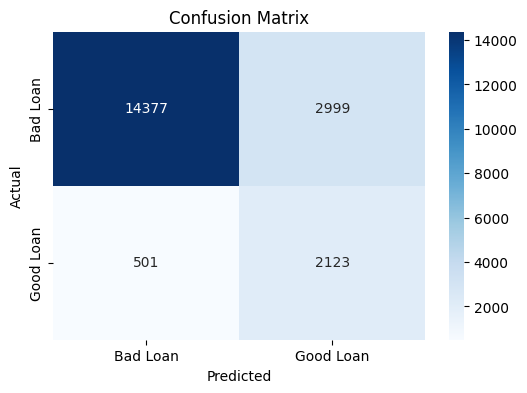

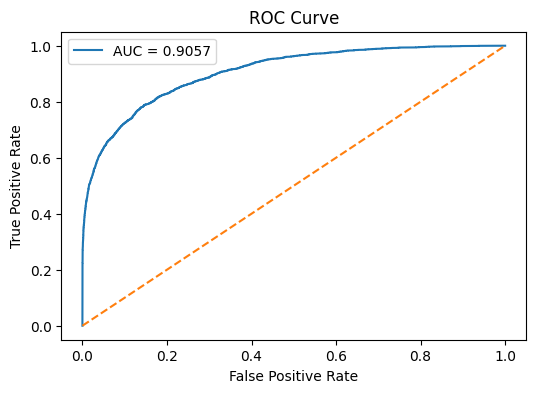


Evaluating Random Forest...
Accuracy: 0.8952
Precision: 0.5694
Recall: 0.8251
F1-Score: 0.6738
AUC-ROC: 0.9518


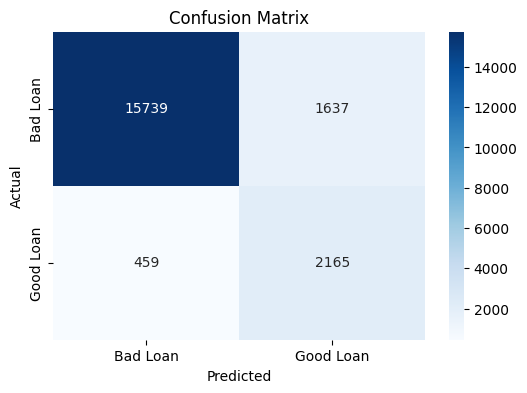

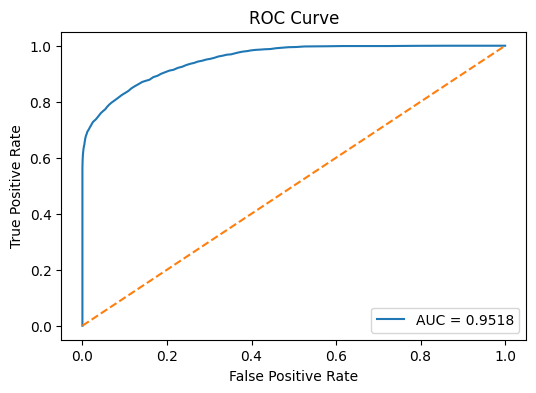


Evaluating Gradient Boosting...
Accuracy: 0.8918
Precision: 0.5602
Recall: 0.8155
F1-Score: 0.6642
AUC-ROC: 0.9444


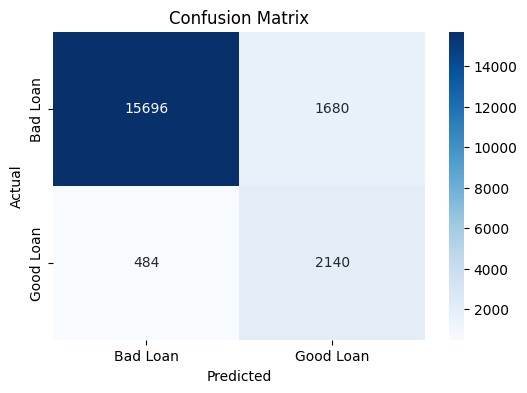

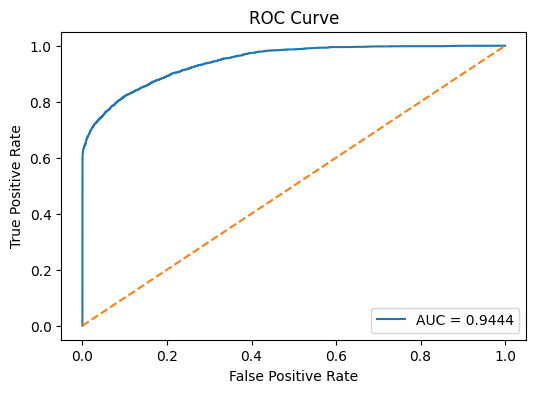


Evaluating Bagging...
Accuracy: 0.9004
Precision: 0.5865
Recall: 0.8178
F1-Score: 0.6831
AUC-ROC: 0.9455


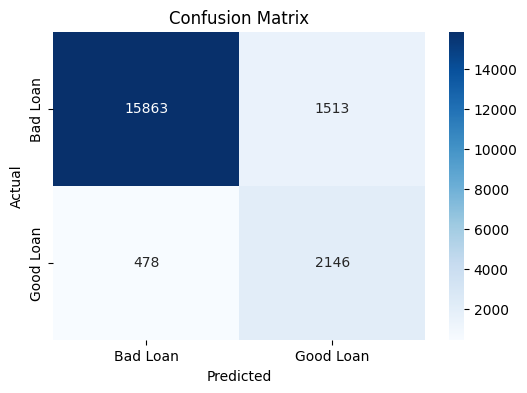

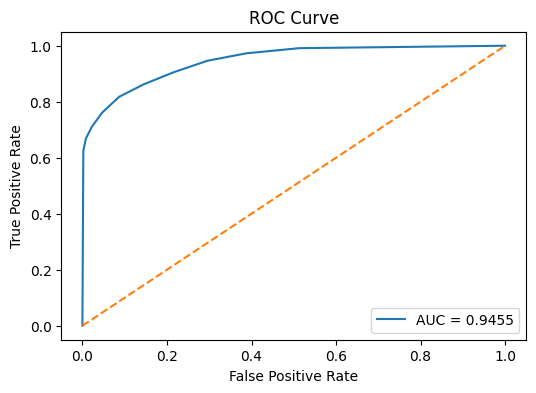

In [73]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Function to evaluate the model on test data
def evaluate_model(model, X_test, y_test):
    # Predictions
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]  # Probability estimates for ROC curve
    
    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)
    
    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"AUC-ROC: {roc_auc:.4f}")
    
    # Plot confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Bad Loan', 'Good Loan'], yticklabels=['Bad Loan', 'Good Loan'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.4f}")
    plt.plot([0, 1], [0, 1], linestyle="--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()
    plt.show()

# Evaluate each model
for name, model in models.items():
    print(f"\nEvaluating {name}...")
    evaluate_model(model, X_test, y_test)
